/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

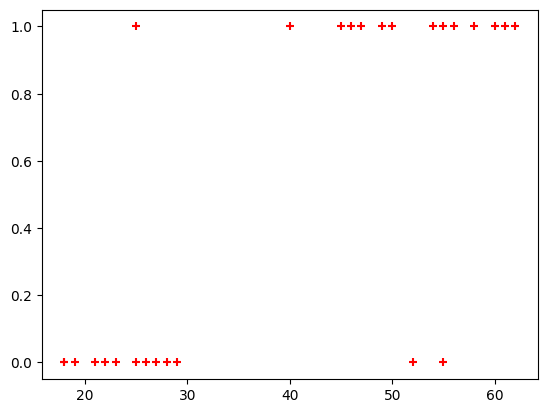

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


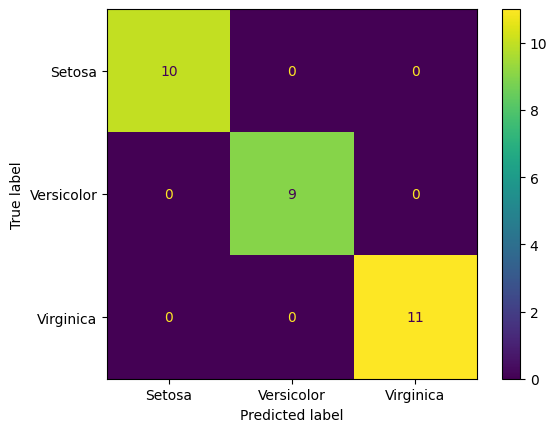

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Multiclass.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1anBybVXILenh0a_R4aM_ZemLrEqYWnJl
"""

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

Dataset Shape: (14999, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Descriptive Statistics:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean   

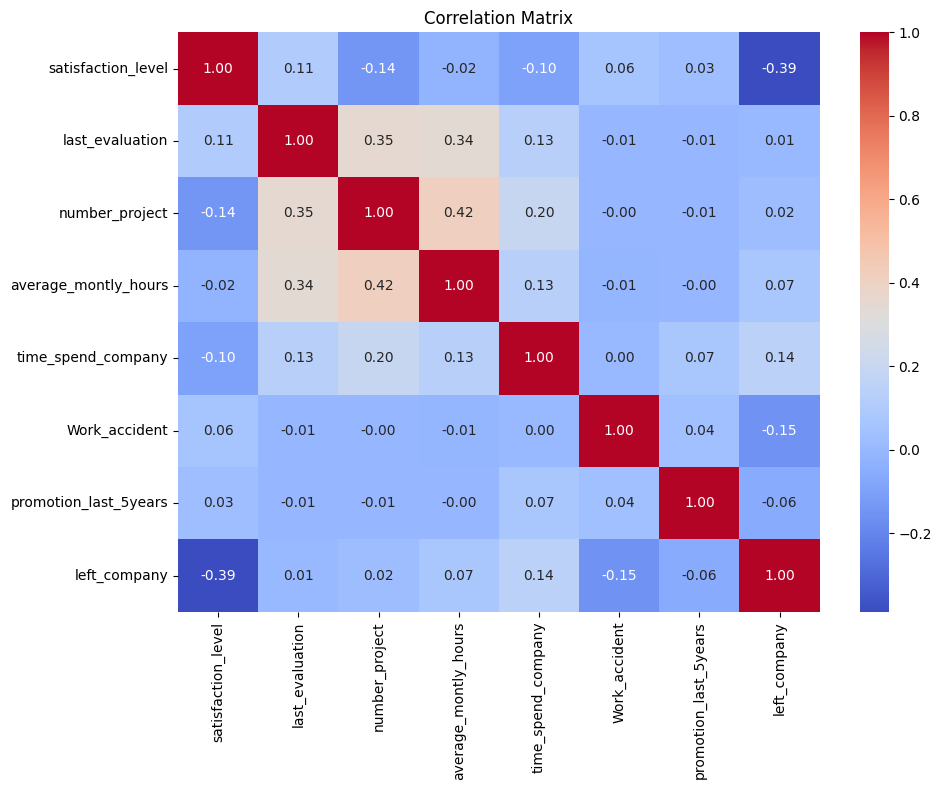

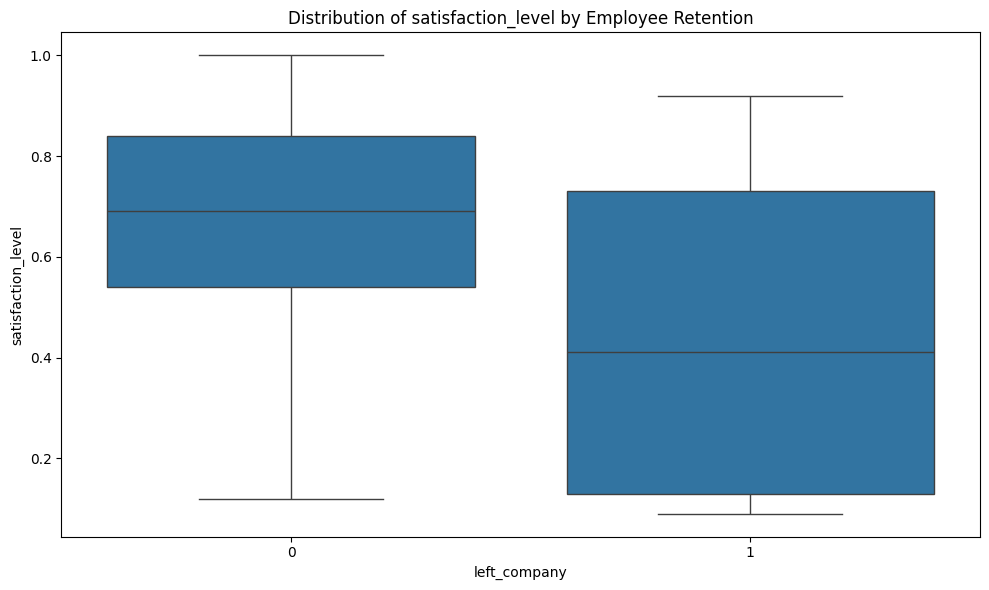

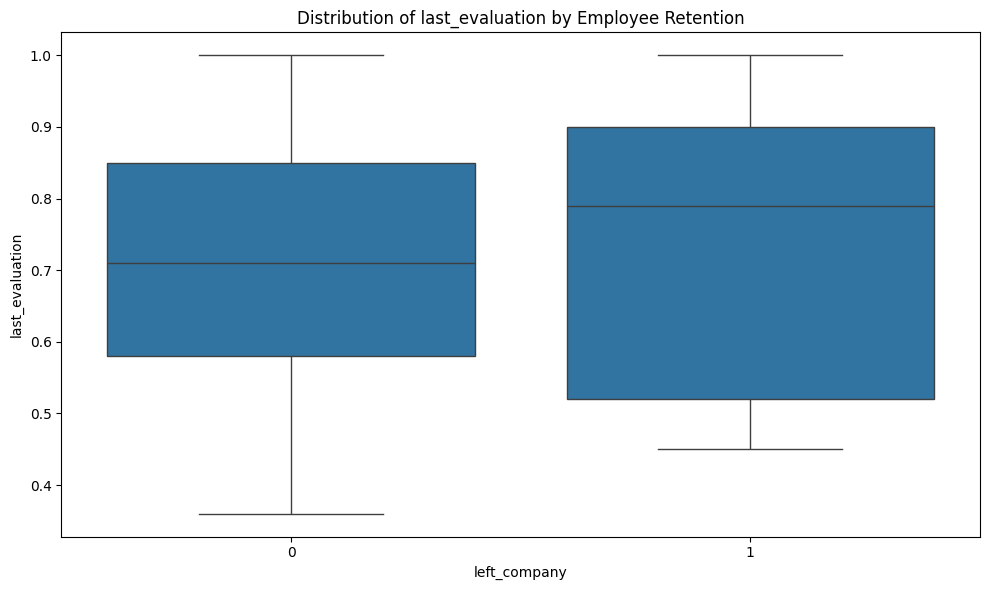

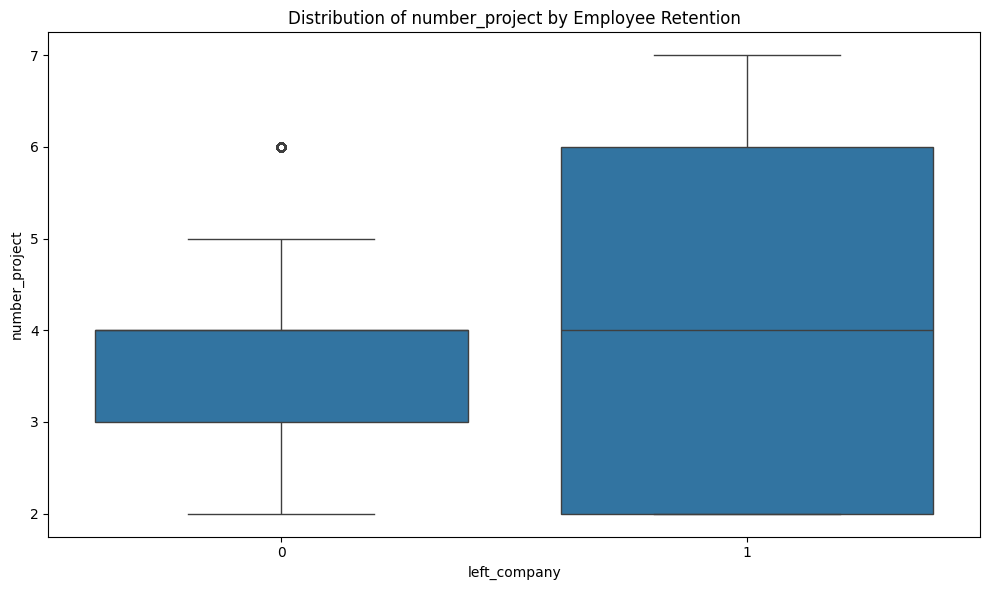

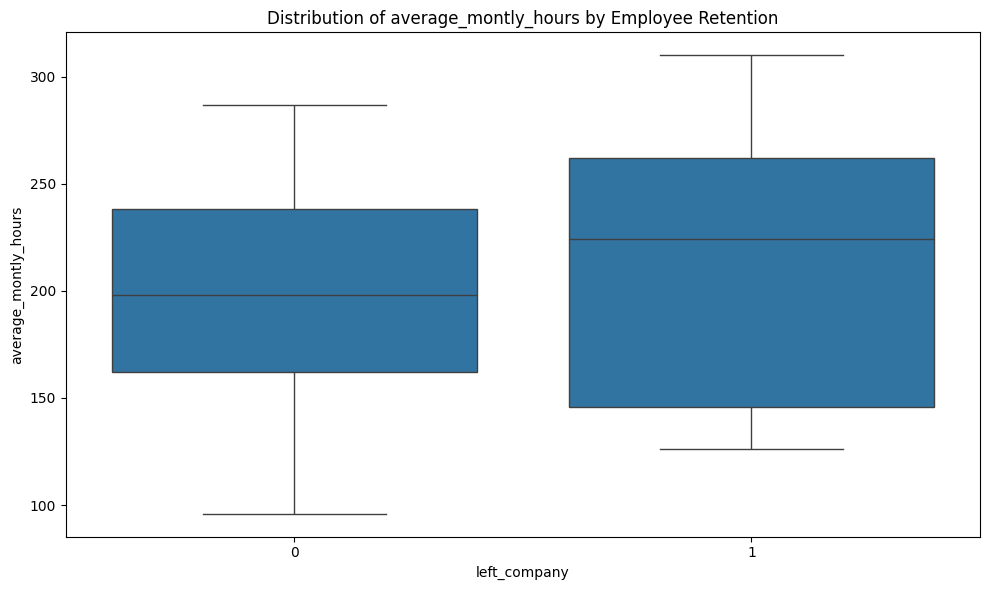

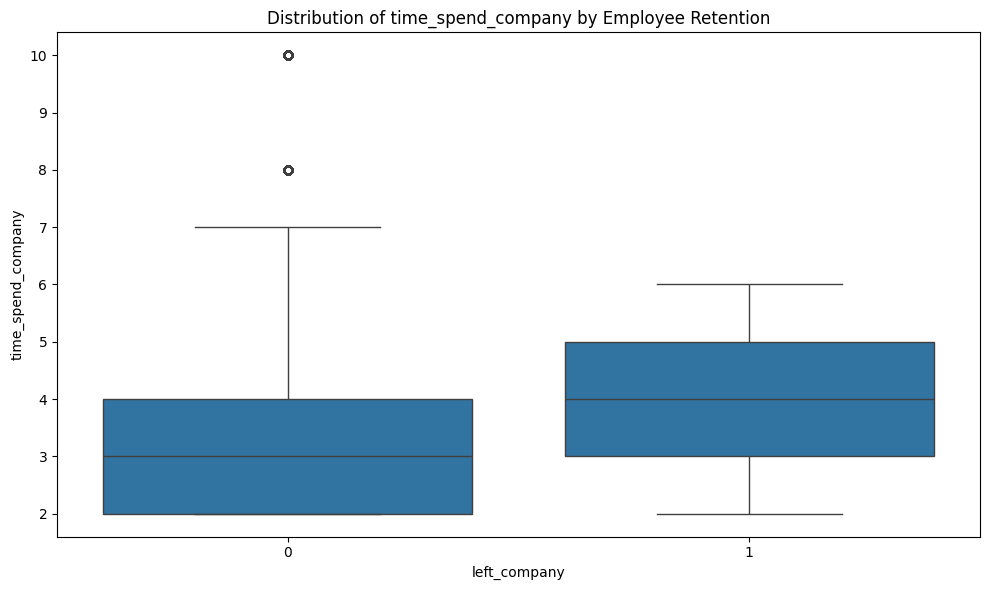

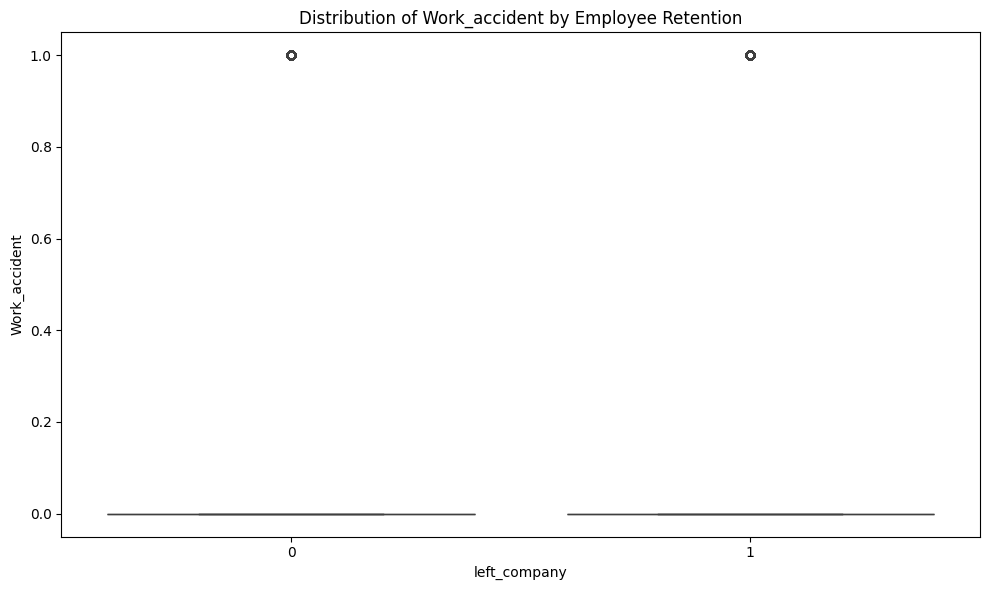

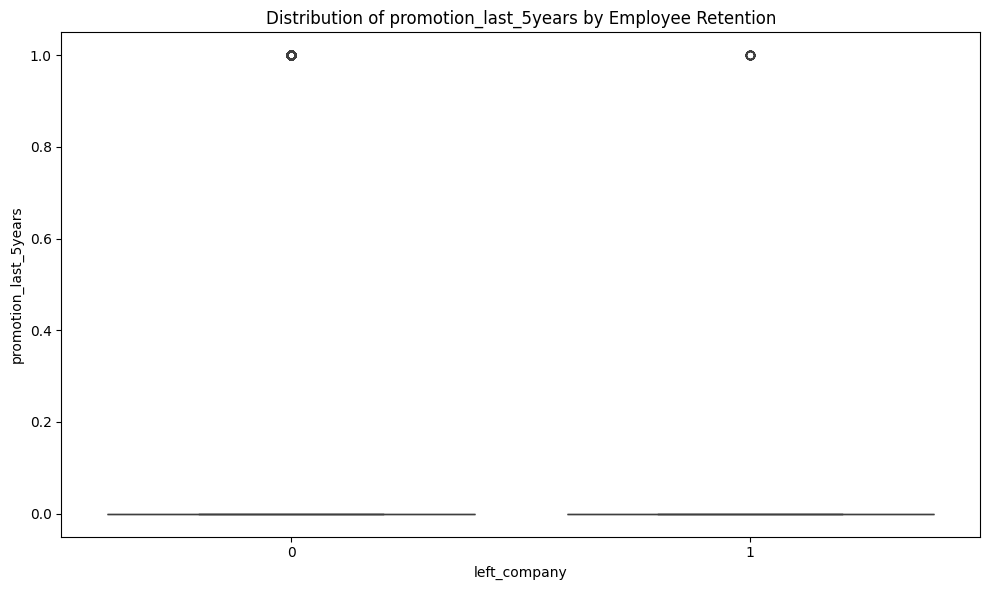

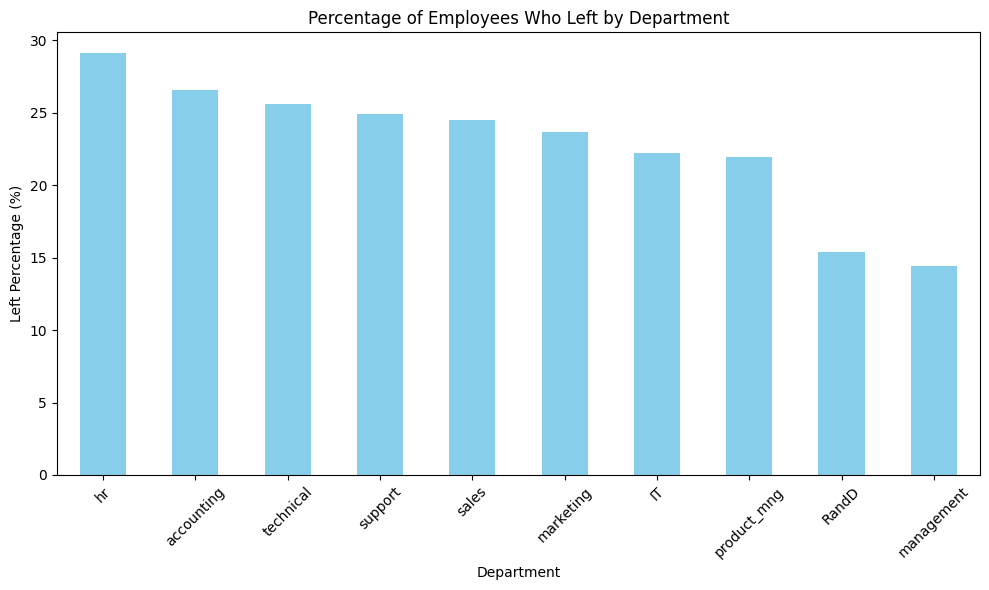

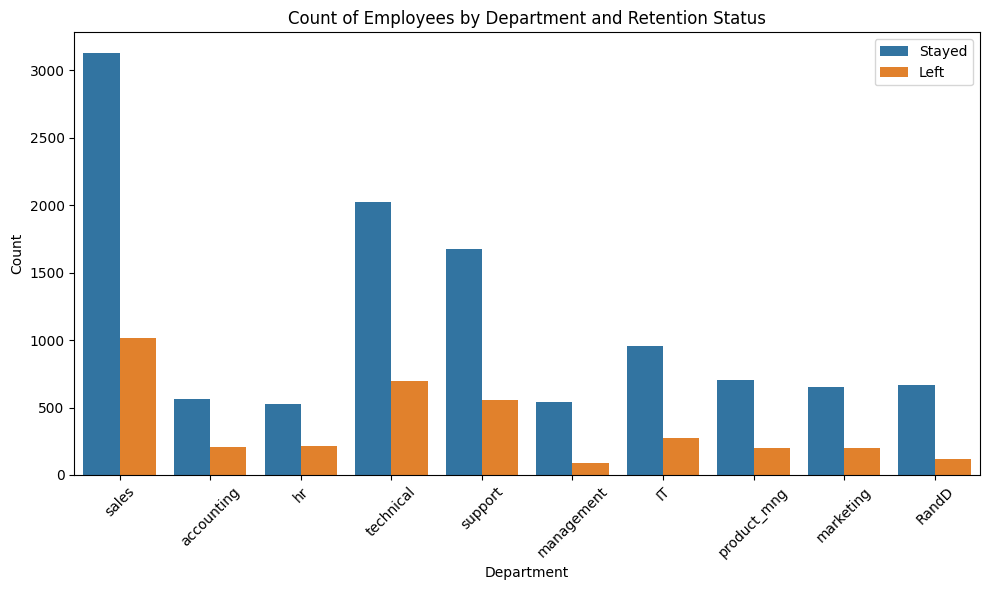

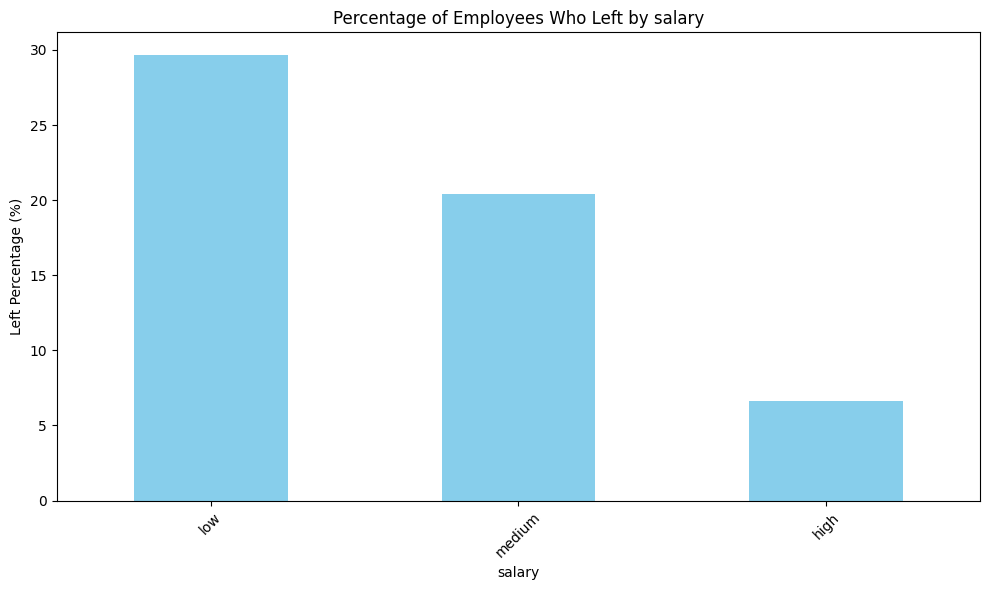

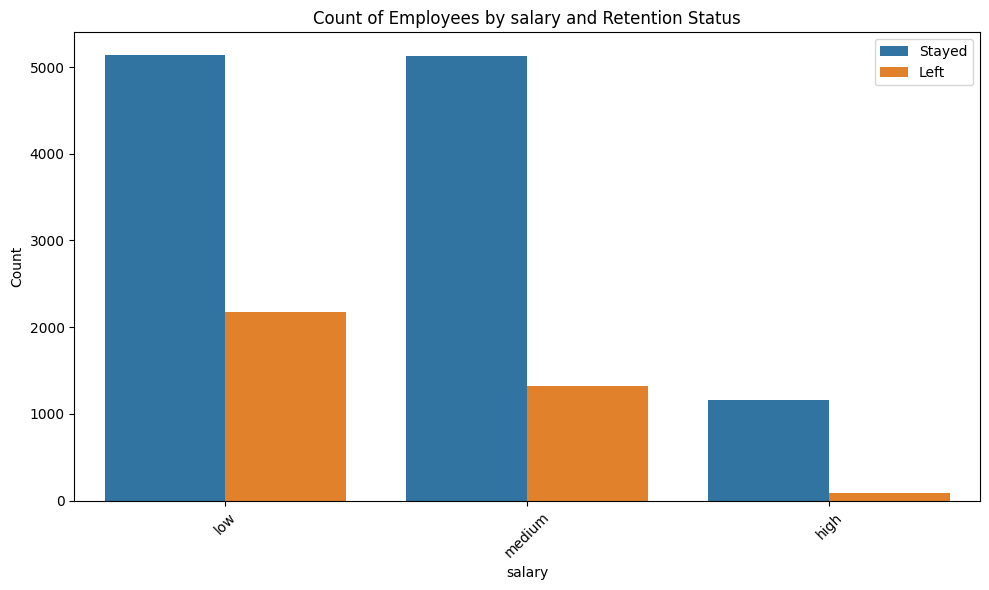


Feature Importance Based on Correlation:
satisfaction_level       0.388375
Work_accident            0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
number_project           0.023787
last_evaluation          0.006567
Name: left_company, dtype: float64

EDA completed. Key variables identified for potential model use.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/HR_comma_sep.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Rename the target variable for clarity
df = df.rename(columns={'left': 'left_company'})

# Check the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['left_company'].value_counts(normalize=True) * 100)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('left_company')  # Remove target variable from numerical columns

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Visualize the correlation matrix for numerical variables only
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols + ['left_company']].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Analyze numerical variables with boxplots
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='left_company', y=col, data=df)
    plt.title(f'Distribution of {col} by Employee Retention')
    plt.tight_layout()
    plt.savefig(f'{col}_boxplot.png')
    plt.show()

# Check categorical variables
for cat_col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Calculate the percentage of employees who left by category
    df_grouped = df.groupby(cat_col)['left_company'].mean().sort_values(ascending=False) * 100
    df_grouped.plot(kind='bar', color='skyblue')
    plt.title(f'Percentage of Employees Who Left by {cat_col}')
    plt.ylabel('Left Percentage (%)')
    plt.xlabel(cat_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{cat_col}_impact.png')
    plt.show()

    # Also create a count plot to see distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_col, hue='left_company', data=df)
    plt.title(f'Count of Employees by {cat_col} and Retention Status')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['Stayed', 'Left'])
    plt.tight_layout()
    plt.savefig(f'{cat_col}_count.png')
    plt.show()

# Print feature importance based on correlation with target
correlation_with_target = correlation['left_company'].drop('left_company').abs().sort_values(ascending=False)
print("\nFeature Importance Based on Correlation:")
print(correlation_with_target)

print("\nEDA completed. Key variables identified for potential model use.")

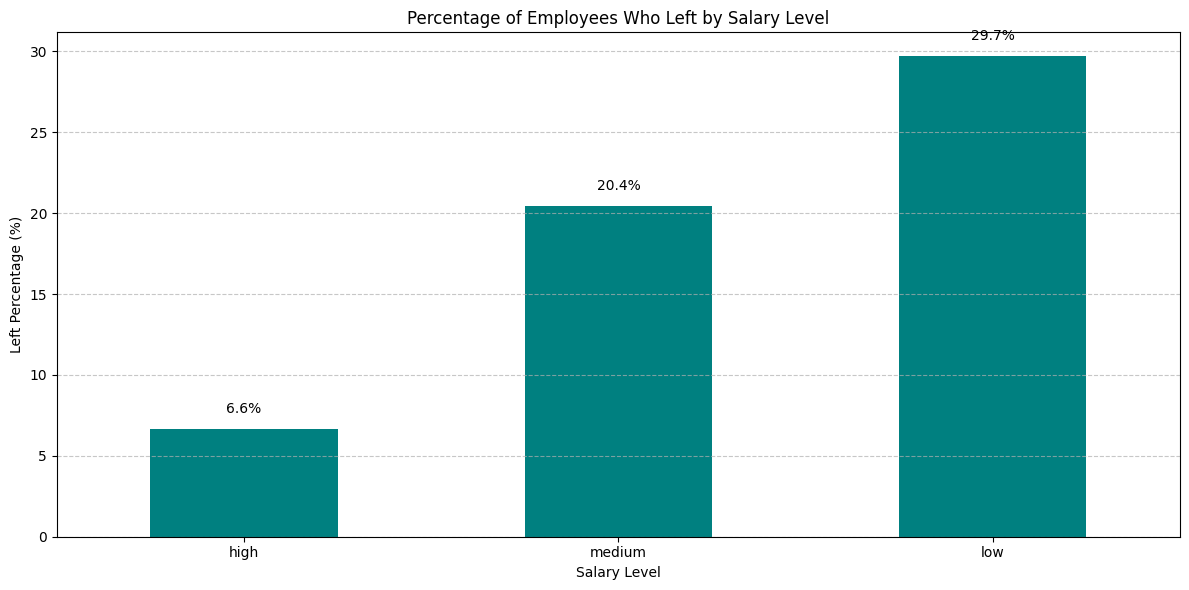

<Figure size 1200x600 with 0 Axes>

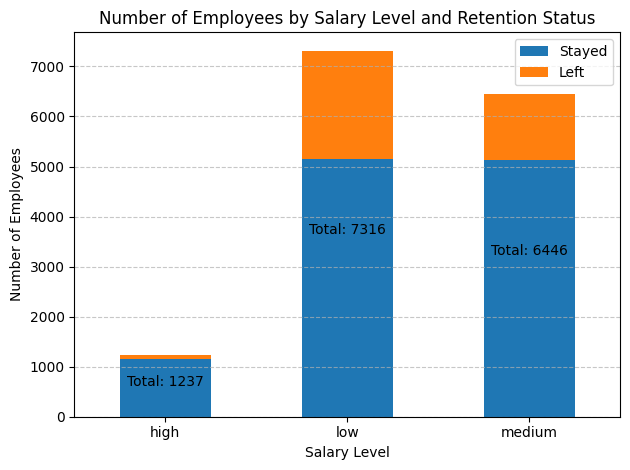

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/HR_comma_sep.csv')

# Rename target variable if needed
if 'left' in df.columns:
    df = df.rename(columns={'left': 'left_company'})

# Bar plot of left percentage by salary category
plt.figure(figsize=(12, 6))
salary_left = df.groupby('salary')['left_company'].mean().sort_values() * 100
salary_left.plot(kind='bar', color='teal')
plt.title('Percentage of Employees Who Left by Salary Level')
plt.ylabel('Left Percentage (%)')
plt.xlabel('Salary Level')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, v in enumerate(salary_left):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.savefig('salary_impact_retention.png')
plt.show()

# Additional salary analysis - count distribution
plt.figure(figsize=(12, 6))
salary_counts = df.groupby(['salary', 'left_company']).size().unstack()
salary_counts.plot(kind='bar', stacked=True)
plt.title('Number of Employees by Salary Level and Retention Status')
plt.ylabel('Number of Employees')
plt.xlabel('Salary Level')
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Left'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, total in enumerate(salary_counts.sum(axis=1)):
    plt.text(i, total/2, f"Total: {total}", ha='center')

plt.tight_layout()
plt.savefig('salary_distribution.png')
plt.show()

Available columns in the dataset: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
Using 'Department' as the department column


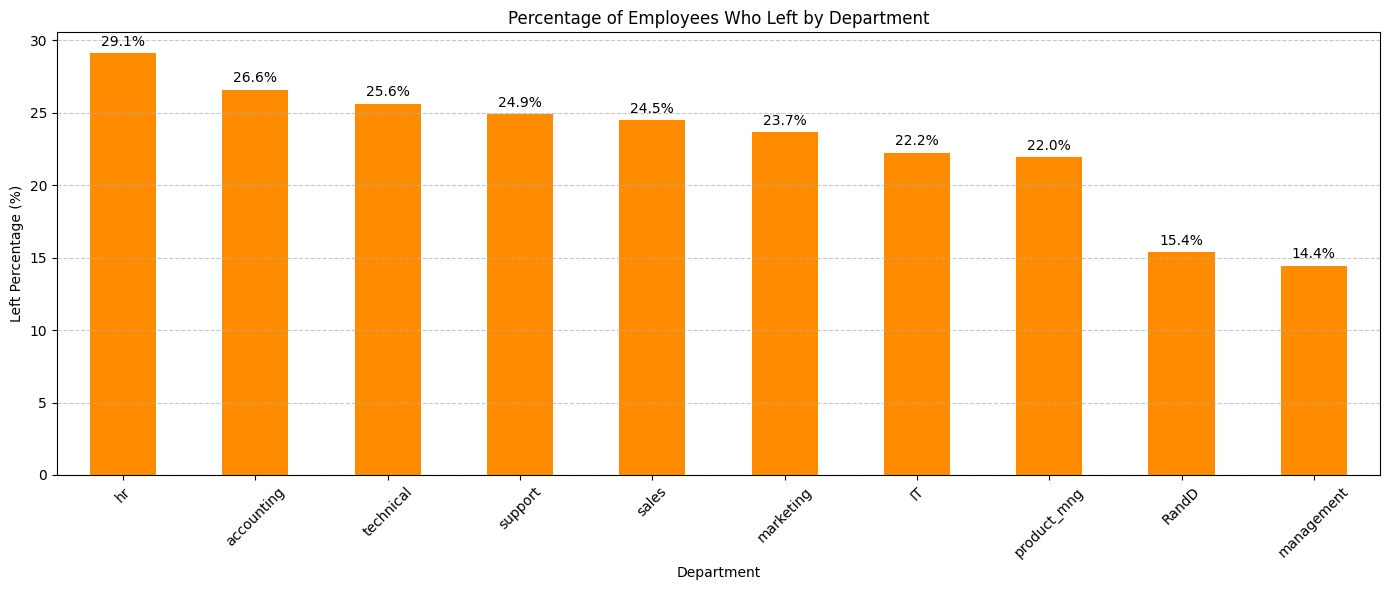

<Figure size 1400x600 with 0 Axes>

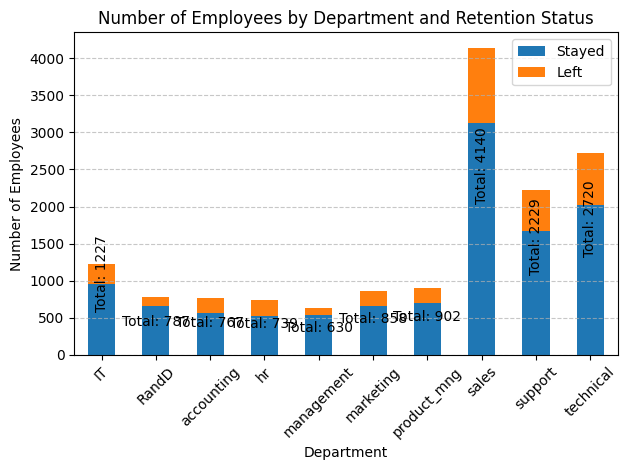

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/HR_comma_sep.csv')

# Check column names to see what the actual department column is called
print("Available columns in the dataset:", df.columns.tolist())

# Try to identify the department column - it might have a different name
# Let's check first if 'department' exists
department_col = 'department'
if department_col not in df.columns:
    # Try to find a column that might represent department
    possible_dept_cols = [col for col in df.columns if 'dep' in col.lower()]
    if possible_dept_cols:
        department_col = possible_dept_cols[0]
        print(f"Using '{department_col}' as the department column")
    else:
        print("No department column found. Please check your dataset.")
        # You could exit here or choose a different column to analyze

# Rename target variable if needed
if 'left' in df.columns:
    df = df.rename(columns={'left': 'left_company'})
elif 'left_company' not in df.columns:
    print("Warning: Could not find the target column 'left' or 'left_company'")
    # Try to find a column that might represent whether employees left
    possible_target_cols = [col for col in df.columns if any(term in col.lower() for term in ['left', 'exit', 'retention', 'turnover'])]
    if possible_target_cols:
        target_col = possible_target_cols[0]
        print(f"Using '{target_col}' as the target column")
        df = df.rename(columns={target_col: 'left_company'})
    else:
        print("No target column found. Please check your dataset.")

# Only proceed if we found both columns
if department_col in df.columns and 'left_company' in df.columns:
    # Bar plot of left percentage by department
    plt.figure(figsize=(14, 6))
    dept_left = df.groupby(department_col)['left_company'].mean().sort_values(ascending=False) * 100
    dept_left.plot(kind='bar', color='darkorange')
    plt.title(f'Percentage of Employees Who Left by {department_col}')
    plt.ylabel('Left Percentage (%)')
    plt.xlabel(department_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels
    for i, v in enumerate(dept_left):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

    plt.tight_layout()
    plt.savefig('department_impact_retention.png')
    plt.show()

    # Additional department analysis - count distribution
    plt.figure(figsize=(14, 6))
    dept_counts = df.groupby([department_col, 'left_company']).size().unstack()
    dept_counts.plot(kind='bar', stacked=True)
    plt.title(f'Number of Employees by {department_col} and Retention Status')
    plt.ylabel('Number of Employees')
    plt.xlabel(department_col)
    plt.xticks(rotation=45)
    plt.legend(['Stayed', 'Left'], loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, total in enumerate(dept_counts.sum(axis=1)):
        plt.text(i, total/2, f"Total: {total}", ha='center', rotation=90 if total > 1000 else 0)

    plt.tight_layout()
    plt.savefig('department_distribution.png')
    plt.show()
else:
    print("Cannot create department plots due to missing required columns.")

Available columns in the dataset: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
Categorical columns: ['Department', 'salary']
Numerical columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
Model training complete

Feature Importance:
                  Feature  Importance
16             salary_low    1.963703
17          salary_medium    1.443744
0      satisfaction_level    1.040766
7        Department_RandD    0.585130
5           Work_accident    0.528231
9           Department_hr    0.425654
4      time_spend_company    0.388244
2          number_project    0.371266
10  Department_management    0.251485
15   Department_technical    0.251473


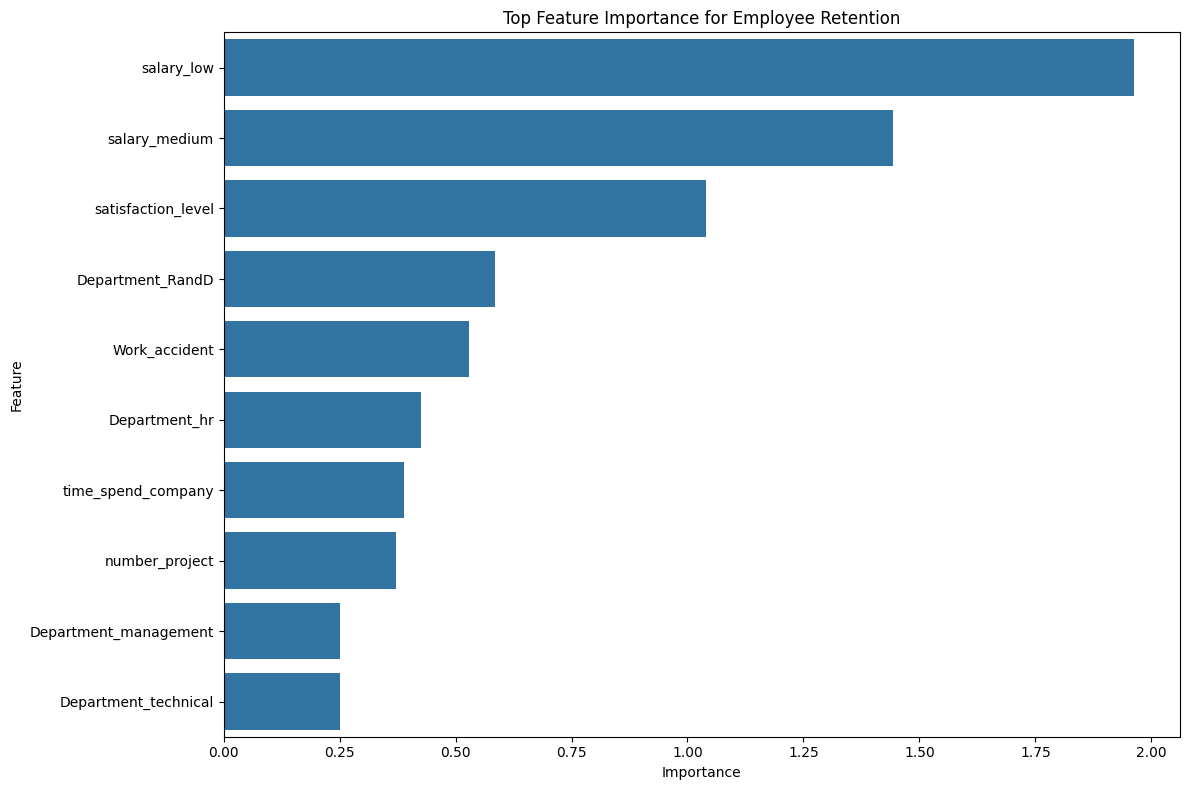

Model saved as 'retention_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('/content/HR_comma_sep.csv')

# Print all column names to identify actual names in the dataset
print("Available columns in the dataset:", df.columns.tolist())

# Rename target variable if needed
target_col = None
if 'left' in df.columns:
    target_col = 'left'
    df = df.rename(columns={'left': 'left_company'})
elif 'left_company' in df.columns:
    target_col = 'left_company'
else:
    # Try to find a suitable target column
    possible_targets = [col for col in df.columns if any(word in col.lower() for word in ['left', 'exit', 'churn', 'retention'])]
    if possible_targets:
        target_col = possible_targets[0]
        df = df.rename(columns={target_col: 'left_company'})
        print(f"Using '{target_col}' as target column, renamed to 'left_company'")
    else:
        print("Could not identify target column. Please specify it manually.")
        exit(1)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'left_company' in numerical_cols:
    numerical_cols.remove('left_company')  # Remove target from features

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Select features based on what's available
X = df.drop('left_company', axis=1)
y = df['left_company']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create preprocessing steps based on identified column types
preprocessor_steps = []

if numerical_cols:
    preprocessor_steps.append(('num', StandardScaler(), numerical_cols))

if categorical_cols:
    preprocessor_steps.append(('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols))

# Create preprocessor only if we have steps
if preprocessor_steps:
    preprocessor = ColumnTransformer(transformers=preprocessor_steps)

    # Create the pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train the model
    model.fit(X_train, y_train)
    print("Model training complete")

    # Feature importance analysis - fixed version
    def get_feature_importance(model, categorical_cols, numerical_cols):
        try:
            # Get coefficients from the model
            coefficients = model.named_steps['classifier'].coef_[0]

            # Start with numerical feature names
            feature_names = numerical_cols.copy()

            # Add encoded categorical feature names
            if categorical_cols:
                try:
                    # Correct way to get transformers from ColumnTransformer
                    # First, find which index has the categorical encoder
                    cat_idx = None
                    for i, (name, _, _) in enumerate(model.named_steps['preprocessor'].transformers_):
                        if name == 'cat':
                            cat_idx = i
                            break

                    if cat_idx is not None:
                        # Get the transformer at that index
                        ohe = model.named_steps['preprocessor'].transformers_[cat_idx][1]
                        # Get the feature names
                        encoded_cats = ohe.get_feature_names_out(categorical_cols).tolist()
                        feature_names.extend(encoded_cats)
                    else:
                        print("Could not find 'cat' transformer")
                except Exception as e:
                    print(f"Error getting encoded feature names: {e}")
                    # Add placeholders for encoded features
                    for col in categorical_cols:
                        feature_names.append(f"{col}_encoded")

            # Make sure feature_names matches coefficients length
            if len(feature_names) != len(coefficients):
                print(f"Warning: Feature names ({len(feature_names)}) and coefficients ({len(coefficients)}) length mismatch")
                # Create generic feature names that match the coefficient count
                feature_names = [f"Feature_{i}" for i in range(len(coefficients))]

            # Create the importance dataframe
            feature_importance = pd.DataFrame({
                'Feature': feature_names,
                'Importance': np.abs(coefficients)
            })

            return feature_importance.sort_values('Importance', ascending=False)

        except Exception as e:
            print(f"Error calculating feature importance: {e}")
            return pd.DataFrame({'Feature': ['Error'], 'Importance': [0]})

    # Get and display feature importance
    feature_importance = get_feature_importance(model, categorical_cols, numerical_cols)
    print("\nFeature Importance:")
    print(feature_importance.head(10))

    # Plot feature importance
    if len(feature_importance) > 0:
        import matplotlib.pyplot as plt
        import seaborn as sns

        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(min(10, len(feature_importance)))
        sns.barplot(x='Importance', y='Feature', data=top_features)
        plt.title('Top Feature Importance for Employee Retention')
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        plt.show()

    # Store the model for use in the next step
    import joblib
    joblib.dump(model, 'retention_model.pkl')
    print("Model saved as 'retention_model.pkl'")
else:
    print("No features available for preprocessing.")

Model Accuracy: 0.7860

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500


Confusion Matrix:
[[3171  257]
 [ 706  366]]


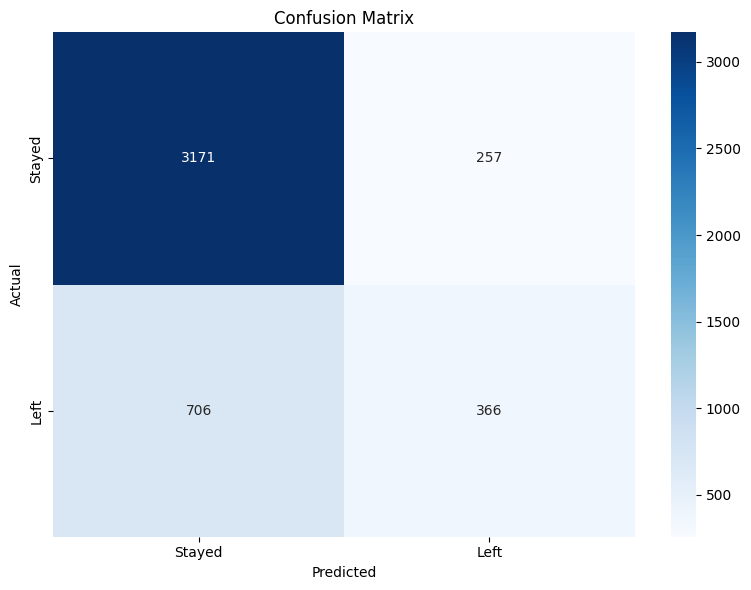

ROC AUC Score: 0.8152


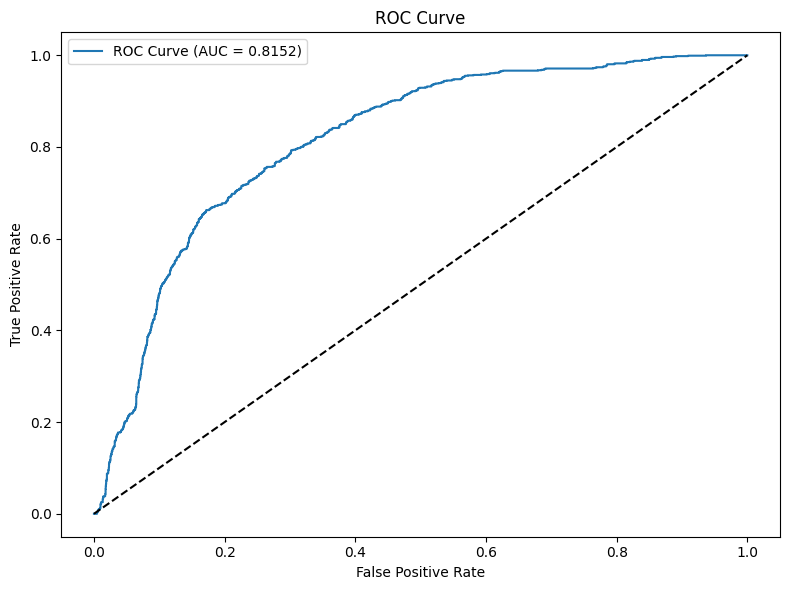

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# This code assumes you've already built the model in step 4
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Optional: Calculate and display additional metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

Dataset shape: (101, 18)

First few rows:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0         

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


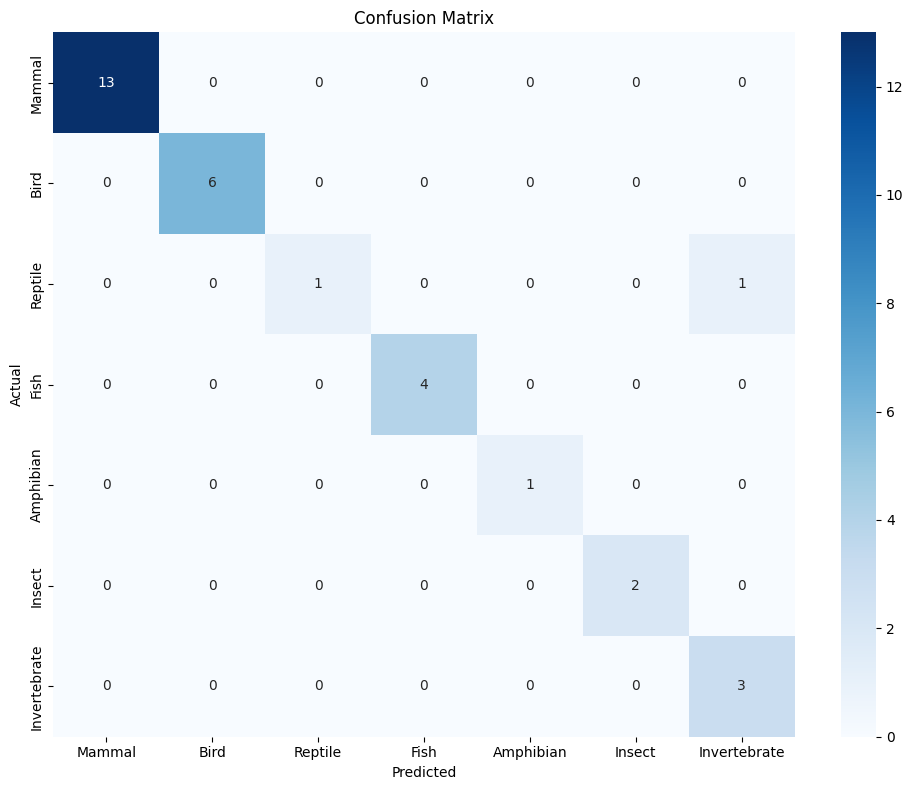


Feature Importance:
     Feature  Importance
8   backbone    0.427496
9   breathes    0.372695
7    toothed    0.346239
5    aquatic    0.344645
1   feathers    0.343725
2       eggs    0.327081
12      legs    0.325793
13      tail    0.313253
3       milk    0.277296
4   airborne    0.268229
11      fins    0.247359
0       hair    0.241356
15   catsize    0.184779
6   predator    0.153535
10  venomous    0.144931
14  domestic    0.075169


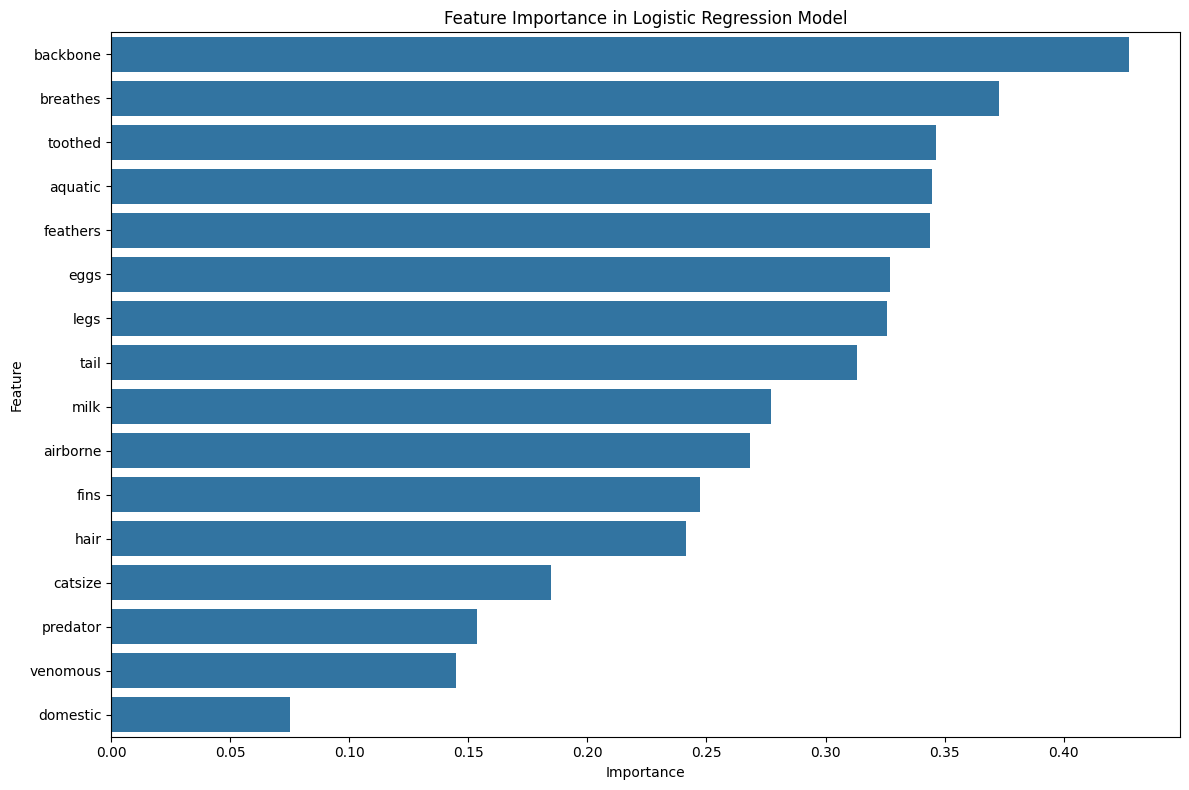

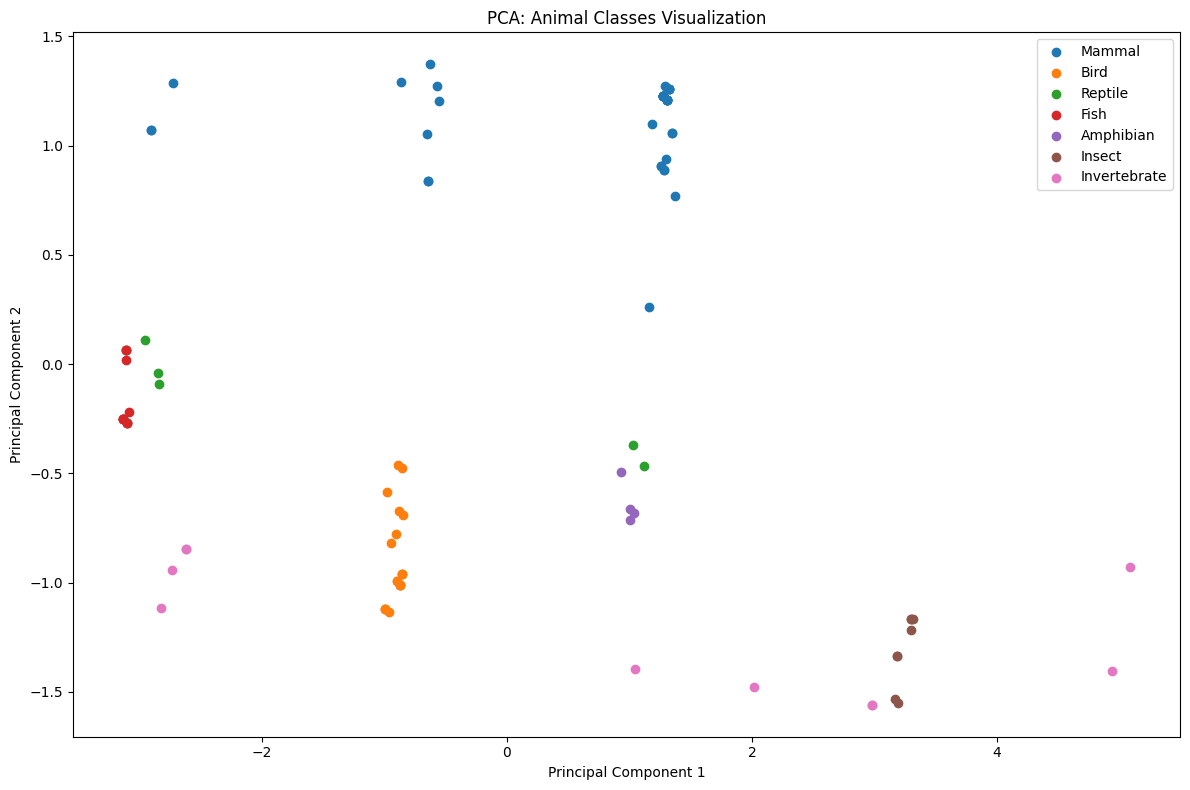

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load and preprocess the data
# Load the dataset
data = pd.read_csv('/content/zoo-data.csv')

# Quick examination of the data
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Get basic statistics
print("\nBasic statistics:")
print(data.describe())

# Class distribution
print("\nClass distribution:")
print(data['class_type'].value_counts())

# Mapping class_type to meaningful labels (optional)
class_names = {
    1: 'Mammal',
    2: 'Bird',
    3: 'Reptile',
    4: 'Fish',
    5: 'Amphibian',
    6: 'Insect',
    7: 'Invertebrate'
}

# Separate features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the distribution of classes in train and test sets
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())

# 3. Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build and train the logistic regression model
# Using multinomial logistic regression since we have multiple classes
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = model.predict(X_test_scaled)

# 6. Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_names[i] for i in sorted(class_names.keys())],
            yticklabels=[class_names[i] for i in sorted(class_names.keys())])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# 8. Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(model.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# 9. Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression Model')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 10. Visualize the data (optional)
# PCA to visualize high-dimensional data in 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
for i in np.unique(y):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=class_names[i])

plt.title('PCA: Animal Classes Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()